**Install All the Required Packages**

In [ ]:
!pip install ultralytics

**Import All the Required Libraries**

In [ ]:
from ultralytics import YOLO

In [ ]:
from IPython.display import Image

**Load the YOLOv12 Model**

In [ ]:
model = YOLO("yolo12x.pt")

**Download Sample Image and Video**

In [ ]:
!gdown "https://drive.google.com/uc?id=1Xa1EJO_Uwv-qr0i72VK2TaQALz7X0EP1&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Xa1EJO_Uwv-qr0i72VK2TaQALz7X0EP1&confirm=t
To: /content/image.jpg
100% 214k/214k [00:00<00:00, 110MB/s]


In [ ]:
!gdown "https://drive.google.com/uc?id=1l65gM2eQMhutLP9jpySZfaQIAB_OqO2j&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1l65gM2eQMhutLP9jpySZfaQIAB_OqO2j&confirm=t
To: /content/video.mp4
100% 3.14M/3.14M [00:00<00:00, 246MB/s]


**Object Detection in Images using YOLOv12**

In [ ]:
result = model.predict(source = "image.jpg")


image 1/1 /content/image.jpg: 448x640 13 persons, 1 bicycle, 1 bus, 2 traffic lights, 1 backpack, 4 handbags, 77.8ms
Speed: 2.9ms preprocess, 77.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
result[0].show()

**Save the Model Predictions**

In [ ]:
# Save the image to drive
result = model.predict(source = "image.jpg", save=True)


image 1/1 /content/image.jpg: 448x640 13 persons, 1 bicycle, 1 bus, 2 traffic lights, 1 backpack, 4 handbags, 83.8ms
Speed: 2.2ms preprocess, 83.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict3


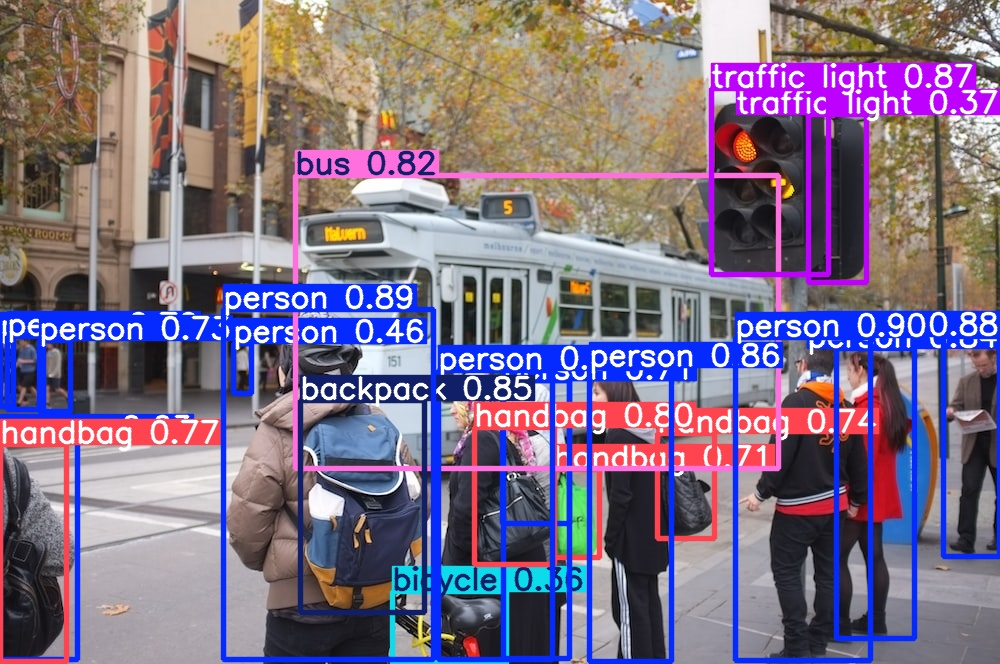

In [ ]:
Image("/content/runs/detect/predict/image.jpg", width=500)

**Model Predictions on Specific Classes**

In [ ]:
# Detect only two selected classes
result = model.predict(source = "image.jpg", classes = [0,1], save=True)


image 1/1 /content/image.jpg: 448x640 13 persons, 1 bicycle, 83.9ms
Speed: 2.9ms preprocess, 83.9ms inference, 35.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict


In [ ]:
result[0].show()

**Object Detection in Videos using YOLOv12**

In [ ]:
# Detect objects in a video (458 frames)
# You may need to reload the model (due to classes being restricted above)
results = model.predict(source = "video.mp4", save = True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/458) /content/video.mp4: 384x640 11 persons, 10 bicycles, 2 traffic lights, 2 backpacks, 74.5ms
video 1/1 (frame 2/458) /content/video.mp4: 384x640 12 persons, 10 bicycles, 1 traffic light, 3 backpacks, 72.3ms
video 1/1 (frame 3/458) /content/video.mp4: 384x640 12 persons, 10 bicycles, 1 traffic light, 4 backpacks, 72.0ms
video 1/1 (frame 4/458) /content/video.mp4: 384x640 12 persons, 11 bicycles, 1 traffic light, 2 backpacks, 49.2ms

**Display the Output Video**

In [ ]:
!rm /content/result_compressed.mp4

In [ ]:
# Display the output video
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/video.avi'

# Compressed video path
compressed_path = "/content/result_compressed_3.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)